# Cross Validation

The prefered method of Statistitions to validate models. In this tutorial Trevor will teach us how to do our own 10-fold CV. **Apparently it is really easy.**

In [59]:
library(ISLR)
library(leaps)

predict.regsubsets <- function(object, newdata,id, ...){
    # object is the regsubset object
    # newdata is the data to predict on
    # id is the id of the model?
    form <- as.formula(object$call[[2]]) # Regsubset has a component called call (call used to create it aka the formula)
    mat <- model.matrix(form, newdata) # Like above we make a model matrix
    coefi <- coef(object,id=id) # Extract relevant coefficients
    mat[,names(coefi)]%*%coefi # Return the predictons we make by doing a matrix multiplication
}

# Data preprocessing from 1_Best_Subset_Selection.ipynb
Hitters <- na.omit(Hitters)

### Pseudocode
The pseudocode for this function is simple. We divide our data into 10 parts. Then we make a matrix for our errors with the shape [model x folds]. Then we loop though each of our folds, making sure to exclude 1/10 of our data, and fit a set of models using ```regsubset``` with forward selection. Now we need to loop through each of the models in one of our regsubet objects (in our case there will be 19 models), and make a prediction on our hold out validation set with the help of our ```predict.regsubset``` function. We then get our prediction vector, and just like before, manually calculate the ```cv.errors```

In [63]:
set.seed(11)
nfolds = 20
folds=sample(rep(1:nfolds, length=nrow(Hitters)))
folds
table(folds)

[1] 10 14  4  4 13 17 20 18 20 13 14  2  2 11 11  5  3 13 15 19  5  2 17  3  8
 [26]  7  4  6  7  7  7 10 12  6  6 11 18  8 10 11 18 13 17 20 11 16 20 13  8  7
 [51]  9 13 16 12  5  6 15  5 12  6 14 17 10  7  1  8 11 12 18 12  1  8  2 16 14
 [76] 13 11  1 15 11 12 20 15  8  8 13 19 18  3 16 11  9 15  9 19  8 18 16 18 20
[101]  9 18 17 18 10  1  3  1 10  5  2  5  2 14 14 20  3 16  9 17  4  3  9  8 10
[126] 17  5  9 20  4  7 14 11 19 14  5 16  8 10  6 17  1 10  6 14 16  7  1 19 14
[151]  2 11  7  2  5 17 10  7 19 16  9 15  5 14 20  4  2 20  9 13  3  2 19 12  6
[176]  9  4  3 19 19  9  4 16  1  7 18  5 18 20 16  9  8 19 11 15  3 13  1 17  1
[201] 12 19 11  9 10  3 20  3  4  6 18  2 19  5 17 12 10  4  1  6 10  3  5 15  3
[226] 15  7 13 16 15 14  1  3 17  1 15 12 19  4 16  8 13  2  4 15 20 18 15 12 12
[251] 12  6 13 14 17  2  6  4  8  7  1  2  6

folds
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
14 14 14 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 

In [64]:
cv.errors = matrix(NA,nfolds,19)
for(k in 1:nfolds){
    best.fit = regsubsets(Salary~.,data=Hitters[folds!=k,],nvmax=19,method='forward')
    for(i in 1:19){
        pred=predict.regsubsets(best.fit,Hitters[folds==k,],id=i)# apparently if I had just done predict() it would know to use predict.regsubsets?
        cv.errors[k,i]=mean( (Hitters$Salary[folds==k] - pred)^2)                               
    }                                                
}
cv.errors

132446.29,114137.85,107555.99,127792.18,114611.54,95920.41,107473.39,96449.08,98586.89,116073.23,108642.16,105982.81,104528.15,104660.82,103052.42,103224.14,103092.72,102554.33,102447.71
152575.89,117848.35,108897.97,90581.51,73847.31,61438.11,64050.53,63510.08,62373.69,59531.22,59857.83,63457.35,62583.03,63571.83,63690.24,63215.81,62885.23,62568.02,62441.54
46026.21,34050.00,48706.64,60283.94,61307.26,64763.56,65324.86,73324.40,71839.71,76675.90,75257.06,74001.39,75057.37,73346.93,74248.03,73647.13,74256.80,73849.97,74301.31
74928.65,92381.46,113624.34,118809.56,136880.93,137283.10,148227.23,148221.56,160858.65,164592.92,166491.07,158426.63,162449.61,165326.76,165445.69,164891.14,164453.68,165242.80,165217.96
193437.20,165731.61,197588.75,203304.64,207691.99,176711.84,169266.72,134564.57,123846.36,116307.01,113677.34,116929.06,123298.22,125733.31,124375.65,125448.47,125547.17,124904.37,125416.70
97927.04,76238.47,87568.98,78615.97,66936.10,68462.12,76580.77,70241.82,62339.98,61318.50,60688.44,61536.45,59710.91,61146.00,58852.33,58703.56,58410.88,57878.60,59694.41
31683.76,18712.12,34071.44,27423.61,17864.27,13561.95,16164.12,19611.38,20311.42,20017.90,20041.31,21363.28,21229.82,22197.10,23544.20,23751.03,23839.64,23408.00,23220.33
154752.81,210473.31,196798.24,168115.78,158116.20,159280.00,156184.90,153775.04,147025.92,157021.91,150739.60,155576.99,152295.03,156524.32,161877.69,161444.82,161105.75,161872.32,162471.43
121373.73,77791.49,72434.36,65722.15,65168.97,59817.87,60821.48,57456.94,45125.32,45662.50,44188.73,48689.71,51617.90,50218.46,49507.22,50330.61,50713.97,52478.96,52566.16
116291.28,87665.80,87971.35,92874.71,99650.54,95095.91,98524.45,98889.27,101085.18,108385.55,99327.95,105308.80,104821.08,101207.56,104651.22,105850.19,106676.40,104614.40,105158.79
335793.91,241937.39,206563.52,195599.68,186525.96,182168.40,181118.48,166965.92,180330.55,169680.32,164128.69,163862.76,168915.98,170457.65,169297.71,167022.63,166273.88,167087.08,168193.40


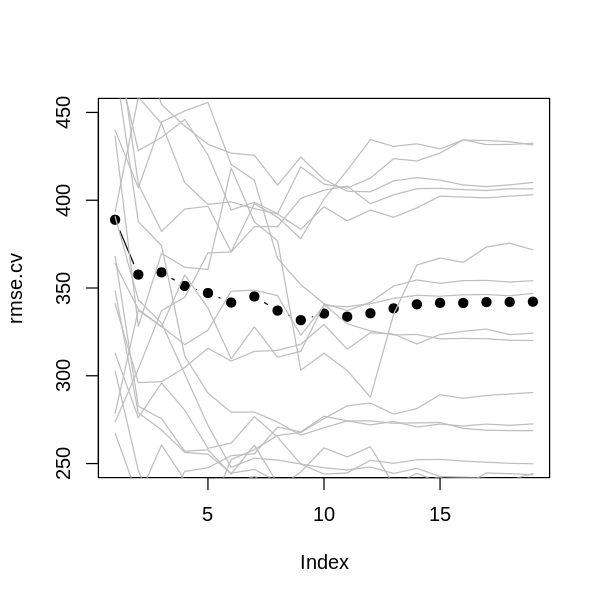

In [65]:
rmse.cv = sqrt(apply(cv.errors,2,mean))
options(repr.plot.width = 5, repr.plot.height = 5)
plot(rmse.cv,type='b', pch=19, ylim=c(250,450))
for(i in 1:nfolds){
    lines(sqrt(cv.errors[i,]), col='grey')
}